# Tejas Budhwal (2101AI42)

In [1]:
!pip install pycryptodome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.8 MB/s eta 0:00:00


In [2]:
import os
import base64
import time
import psutil
import tracemalloc
import matplotlib.pyplot as plt
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad

In [3]:
# AES-256 requires a key size of 32 bytes (256 bits)
KEY_SIZE = 32
BLOCK_SIZE = AES.block_size  # 16 bytes

### Functions to simulate AES Encryption and decryption functionalities

In [9]:
# Key generation function (Random 256-bit key for AES)
def generate_key():
    return get_random_bytes(KEY_SIZE)

# Encryption function to encrypt using AES-256
"""
Arguments:
    key (bytes): 256-bit encryption key.
    plaintext (str): input data to be encrypted.
Returns:
    Ciphertext (bytes): Encrypted data
    IV (bytes): Initialization vector.
"""
def encrypt_data(key, plaintext):
    if len(key) != KEY_SIZE:
        raise ValueError("Key must be 256 bits (32 bytes).")

    cipher = AES.new(key, AES.MODE_CBC)
    iv = cipher.iv
    padded_data = pad(plaintext.encode(), BLOCK_SIZE)
    ciphertext = cipher.encrypt(padded_data)
    return ciphertext, iv

# Decryption function to decrypt AES-256 encrypted data
"""
Arguments:
    key (bytes): 256-bit decryption key.
    ciphertext (bytes): Encrypted data.
    IV (bytes): Initialization vector.
Returns:
    plaintext (str): input data which was encrypted.
"""
def decrypt_data(key, ciphertext, iv):
    if len(key) != KEY_SIZE:
        raise ValueError("Key must be 256 bits (32 bytes).")

    cipher = AES.new(key, AES.MODE_CBC, iv)
    decrypted_data = unpad(cipher.decrypt(ciphertext), BLOCK_SIZE)
    return decrypted_data.decode()

# File encryption to encrypt a file using AES-256 encryption.
"""
Arguments:
    input_file (str): Path to the input file.
    output_file (str): Path to save the encrypted file.
    key (bytes): 256-bit encryption key.
"""
def encrypt_file(input_file, output_file, key):
    with open(input_file, 'rb') as f:
        plaintext = f.read()

    ciphertext, iv = encrypt_data(key, plaintext.decode('utf-8'))

    with open(output_file, 'wb') as f:
        f.write(iv + ciphertext)

# File decryption to decrypt an AES-256 encrypted file.
"""
Arguments:
    input_file (str): Path to the encrypted file.
    output_file (str): Path to save the decrypted file.
    key (bytes): 256-bit decryption key.
"""
def decrypt_file(input_file, output_file, key):
    with open(input_file, 'rb') as f:
        iv = f.read(BLOCK_SIZE)
        ciphertext = f.read()

    plaintext = decrypt_data(key, ciphertext, iv)

    with open(output_file, 'w') as f:
        f.write(plaintext)

# Error handling demonstration
def demo():
    try:
        # Key generation
        key = generate_key()
        print("Generated Key:", base64.b64encode(key).decode())

        # Encrypt and decrypt a sample text
        plaintext = "This is a secret message, not to be seen by anyone."
        ciphertext, iv = encrypt_data(key, plaintext)
        decrypted_text = decrypt_data(key, ciphertext, iv)

        assert plaintext == decrypted_text
        print("Encryption and decryption successful!")

        # File encryption demo
        encrypt_file("sample.txt", "sample_encrypted.aes", key)
        decrypt_file("sample_encrypted.aes", "sample_decrypted.txt", key)
        print("File encryption and decryption successful!")
    except Exception as e:
        print("An error occurred:", str(e))

In [10]:
if __name__ == "__main__":
    demo()

Generated Key: 7HVlTHLne2PvdfVjub052fODH+9kZ4CIWatpu+krS4g=
Encryption and decryption successful!
File encryption and decryption successful!


### Performance testing for the AES

In [11]:
def performance_testing():
    """
    Measures encryption/decryption speeds, memory usage, and CPU utilization for different
    input sizes and displayes the obtained results in a visual format.
    """
    key = generate_key()
    input_sizes = [1024, 10 * 1024, 100 * 1024, 1024 * 1024, 10 * 1024 * 1024]  # Sizes in bytes
    encryption_times = []
    decryption_times = []
    memory_usages = []
    peak_memory_usages = []
    cpu_usages = []
    peak_cpu_usages = []
    encryption_throughput = []
    decryption_throughput = []
    energy_usage = []

    for size in input_sizes:
        plaintext = "A" * size

        # Measure encryption performance
        tracemalloc.start()
        start_time = time.time()
        cpu_start = psutil.cpu_percent(interval=None)
        ciphertext, iv = encrypt_data(key, plaintext)
        encryption_time = time.time() - start_time
        cpu_end = psutil.cpu_percent(interval=None)
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()

        encryption_times.append(encryption_time)
        memory_usages.append(current / 1024)  # Current memory in KB
        peak_memory_usages.append(peak / 1024)  # Peak memory in KB
        cpu_usages.append(cpu_end - cpu_start)
        peak_cpu_usages.append(max(cpu_start, cpu_end))
        encryption_throughput.append(size / encryption_time)  # Bytes per second

        # Estimate energy usage (assuming a constant power rate of 50W for CPU under load)
        energy_usage.append((cpu_end - cpu_start) * encryption_time * 50 / 1000)  # Joules

        # Measure decryption performance
        start_time = time.time()
        decrypt_data(key, ciphertext, iv)
        decryption_time = time.time() - start_time
        decryption_times.append(decryption_time)
        decryption_throughput.append(size / decryption_time)  # Bytes per second

    # Plot results
    plt.figure(figsize=(12, 10))

    # Encryption/Decryption time
    plt.subplot(3, 2, 1)
    plt.plot(input_sizes, encryption_times, label="Encryption Time")
    plt.plot(input_sizes, decryption_times, label="Decryption Time")
    plt.xlabel("Input Size (bytes)")
    plt.ylabel("Time (seconds)")
    plt.title("Encryption/Decryption Time")
    plt.legend()

    # Memory usage
    plt.subplot(3, 2, 2)
    plt.plot(input_sizes, memory_usages, label="Current Memory Usage (KB)", color="blue")
    plt.plot(input_sizes, peak_memory_usages, label="Peak Memory Usage (KB)", color="orange")
    plt.xlabel("Input Size (bytes)")
    plt.ylabel("Memory Usage (KB)")
    plt.title("Memory Usage")
    plt.legend()

    # CPU usage
    plt.subplot(3, 2, 3)
    plt.plot(input_sizes, cpu_usages, label="CPU Usage (%)", color="green")
    plt.plot(input_sizes, peak_cpu_usages, label="Peak CPU Usage (%)", color="red")
    plt.xlabel("Input Size (bytes)")
    plt.ylabel("CPU Usage (%)")
    plt.title("CPU Utilization")
    plt.legend()

    # Throughput
    plt.subplot(3, 2, 4)
    plt.plot(input_sizes, encryption_throughput, label="Encryption Throughput (bytes/sec)", color="purple")
    plt.plot(input_sizes, decryption_throughput, label="Decryption Throughput (bytes/sec)", color="brown")
    plt.xlabel("Input Size (bytes)")
    plt.ylabel("Throughput (bytes/sec)")
    plt.title("Encryption/Decryption Throughput")
    plt.legend()

    # Energy usage
    plt.subplot(3, 2, 5)
    plt.plot(input_sizes, energy_usage, label="Energy Usage (Joules)", color="cyan")
    plt.xlabel("Input Size (bytes)")
    plt.ylabel("Energy Usage (Joules)")
    plt.title("Estimated Energy Consumption")
    plt.legend()

    plt.tight_layout()
    plt.show()

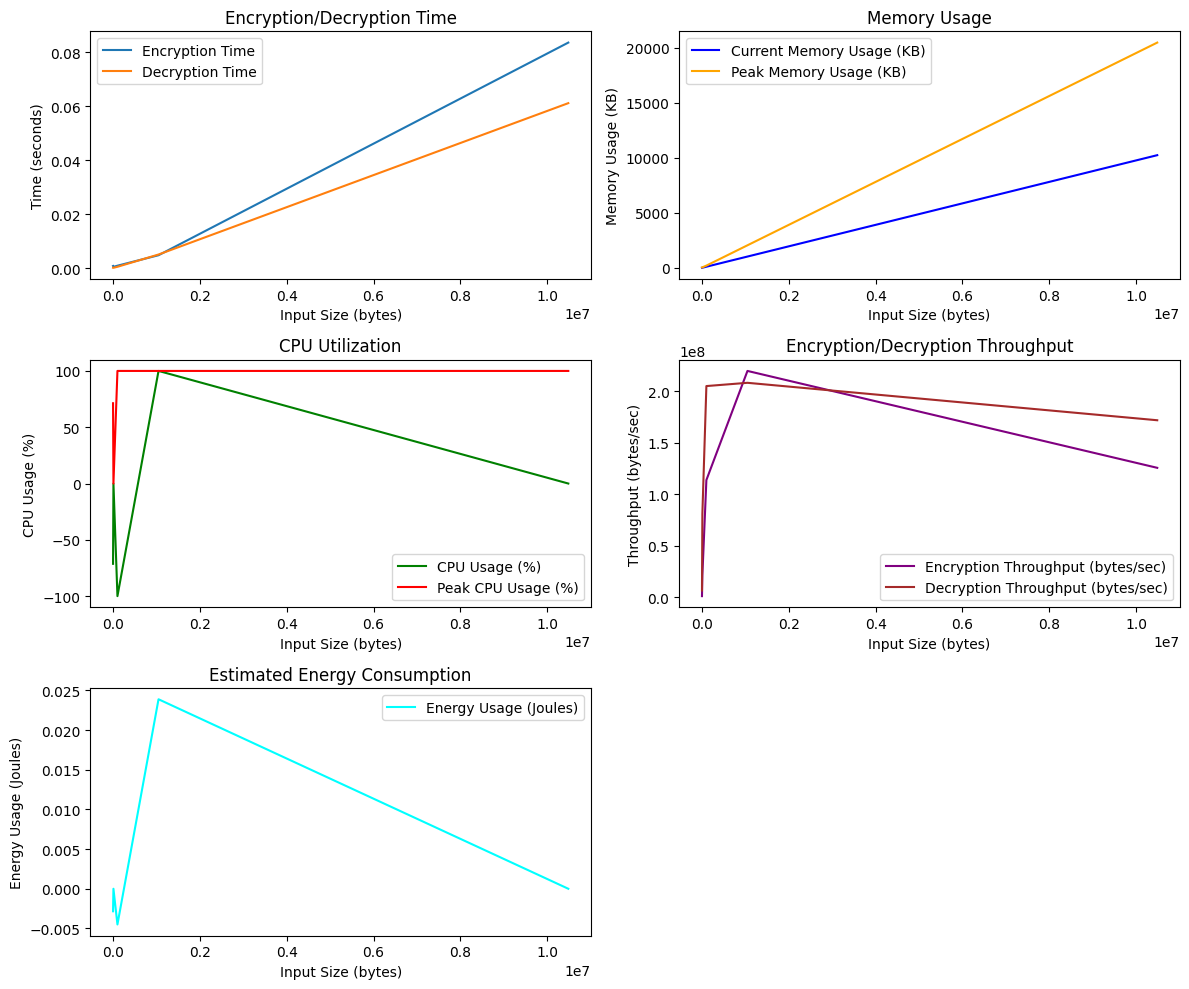

In [7]:
if __name__ == "__main__":
    performance_testing()

### Reccommended optimization to make the working even better

Recommendations for Optimization:
1. Optimize memory management to reduce peak memory usage.
2. Increase throughput by enabling hardware acceleration for cryptographic operations.
3. Monitor and minimize CPU utilization to improve energy efficiency.
4. Test with diverse workloads to ensure consistent performance across different input sizes.